# The two-Stream Instability Model


In this notebook, we will present you 


<IPython.core.display.Javascript object>


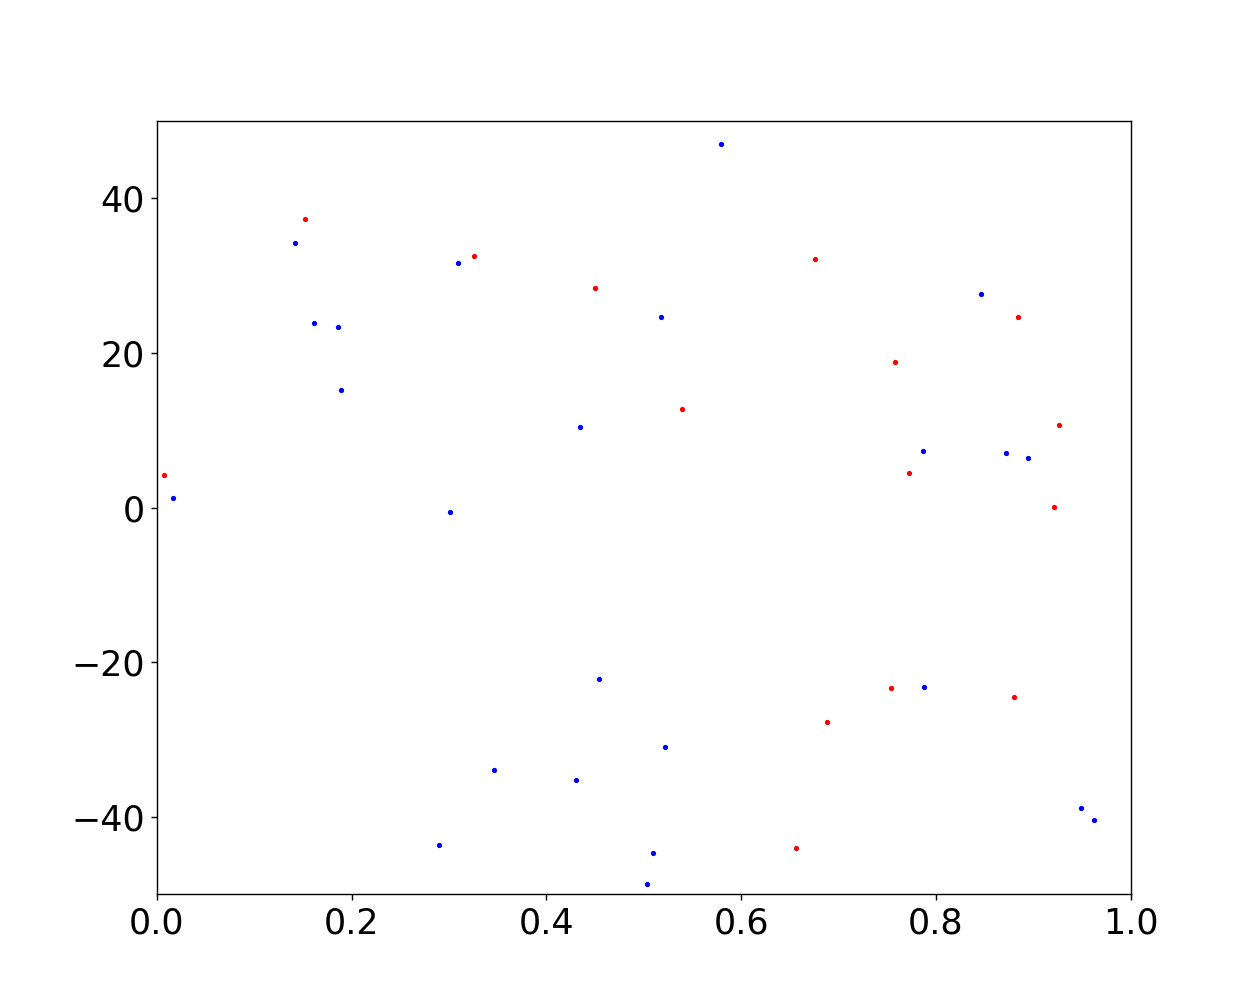

In [20]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# make sure labels are large enough in report
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (10,8)
mpl.rcParams['font.size'] = 20
mpl.rcParams['axes.labelsize'] = 'x-large'
mpl.rcParams['lines.linewidth'] = 2.5
mpl.rcParams['lines.markersize'] = 10.0


#temp_range = np.hstack([np.arange(0.5,2.,0.5), np.arange(2.,2.5,0.05), np.arange(2.5,5,0.5)])

L = 10

pos = np.load("../results/position.npy")
vel = np.load("../results/speed.npy")

#pos = np.random.rand(1000,100)
#vel = np.random.rand(1000,100)

fig = plt.figure()
#plt.legend()
ax = fig.add_subplot(111)
line, = ax.plot([], [], 'bo', ms=2, color ='blue')
line2, = ax.plot([], [], 'bo', ms=2, color = 'red')
ax.set_xlim(0, 1)
ax.set_ylim(-50, 50)
N=pos.shape[1]
T=pos.shape[0]

def make_frame(t):
    
    X = pos[(t%T),:N//2]
    V = vel[(t%T),:N//2]
    line.set_data(X, V)
    X2 = pos[(t%T),N//2:]
    V2 = vel[(t%T),N//2:]
    line2.set_data(X2, V2)
    return line, line2,

animation.FuncAnimation(fig, make_frame, interval=10)





<IPython.core.display.Javascript object>


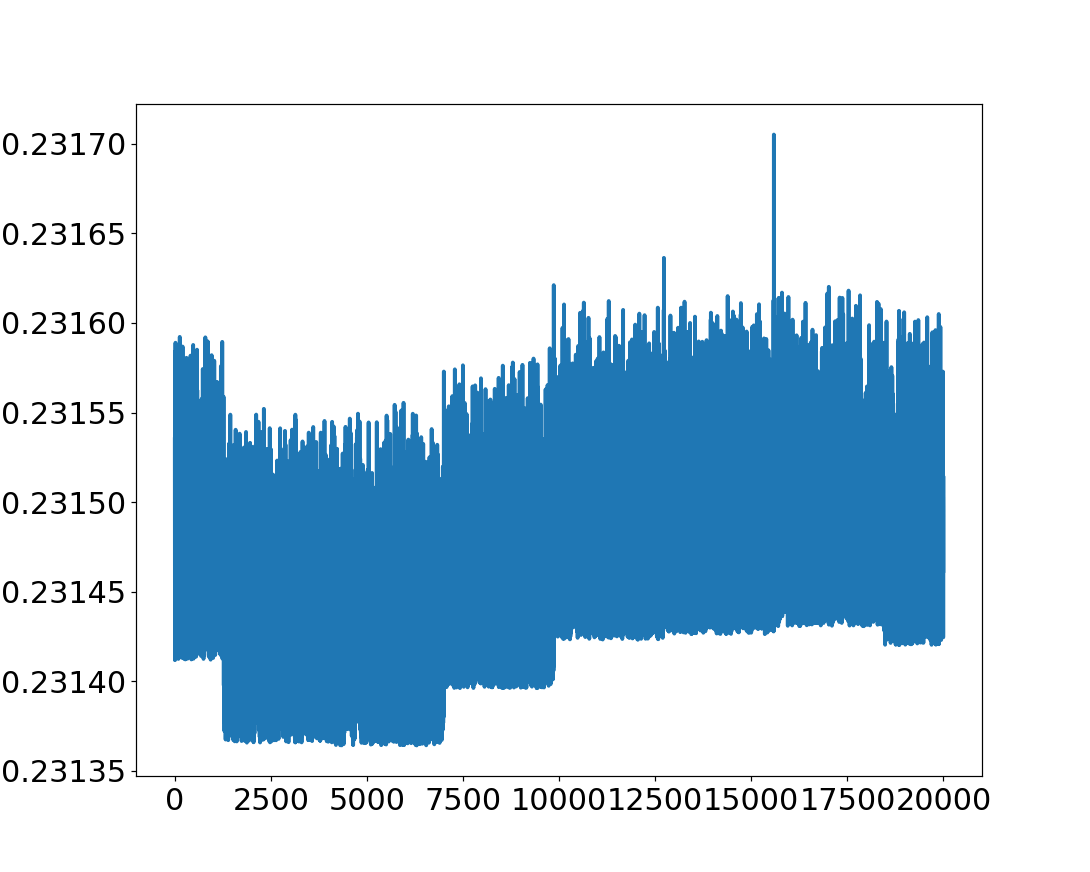

In [27]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
energy = np.load("../results/energy.npy")
plt.plot(energy[1:])
plt.show()

[[ 2477.05982671  2516.25161332  2435.81011186 ...,  2433.5598517
   2512.71199593  2493.92968044]
 [ 2480.98969571  2520.51810373  2441.0729961  ...,  2426.57171061
   2509.02965861  2490.46175481]
 [ 2485.76074279  2524.18087297  2445.69705609 ...,  2423.62862175
   2504.40221186  2486.35927723]
 ..., 
 [ 2448.19982115  2643.48466016  2297.9224623  ...,  2381.40858273
   2587.9956062   2519.18356625]
 [ 2444.22599807  2643.08812738  2299.62391368 ...,  2390.91084511
   2586.09331542  2515.58573276]
 [ 2433.15202573  2656.19282622  2289.75174329 ...,  2380.02224712
   2594.3808536   2498.89789789]]


<IPython.core.display.Javascript object>


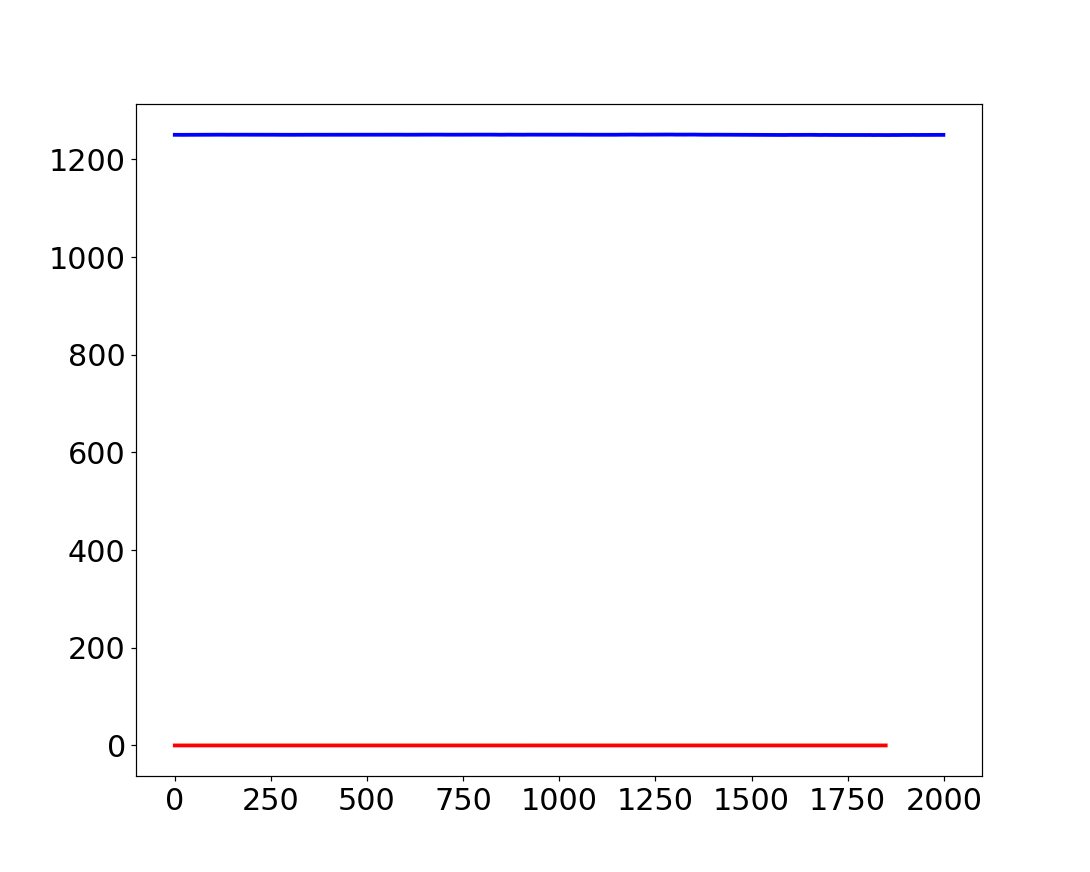

In [50]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
vel = np.load("../results/speed.npy")


ekinetic = 0.5*np.sum(vel**2,axis=1)/20000
T  = ekinetic.shape[0]
N = vel.shape[1]
# we compute temporal means over 100 steps
nstep = 150
edrift = np.zeros(T-nstep,dtype=float)
eth = np.zeros(T-nstep,dtype=float)
sqvel = vel**2
print(sqvel)

v2moy=np.zeros(N)
for i in range(nstep):
    v2moy += sqvel[i,:]/nstep
    
vmoy = np.zeros(N)
for i in range(nstep):
    vmoy += vel[i,:]/nstep
    
eth[0] = 0
for i in range (1,T-nstep):
    vmoy += (vel[i+nstep-1,:]-vel[i-1,:])/nstep
    v2moy += (sqvel[i+nstep-1,:]-sqvel[i-1,:])/nstep
    eth[i] = np.sum(v2moy - vmoy**2)
    
plt.plot(ekinetic, color="blue")
plt.plot(0.5*eth/20000, color="red")
plt.show()


<IPython.core.display.Javascript object>


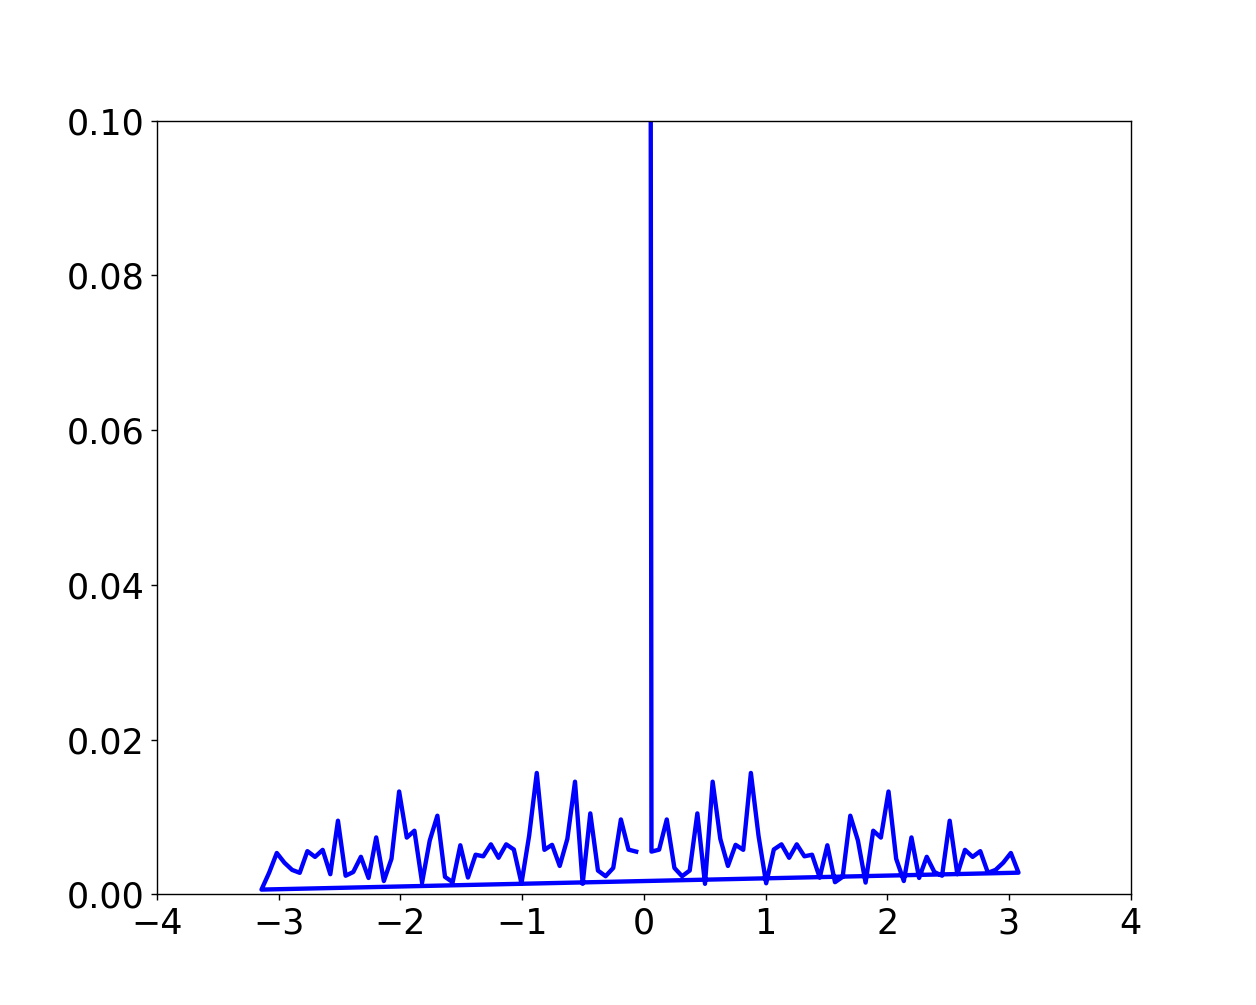

In [19]:
"""Ploting the evolution ok the frequency over time"""

%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

k = np.load("../results/wavevector.npy")
rho_=np.load("../results/density.npy")

fig = plt.figure()
#plt.legend()
ax = fig.add_subplot(111)
line, = ax.plot([], [], color ='blue')
ax.set_xlim(-4, 4)
ax.set_ylim(0,0.1)
n=k.shape[1]
T=k.shape[0]

def make_frame(t):
    
    X = k[(t%T),:]
    Y = rho_[(t%T),:]/rho_[(t%T),0]
    line.set_data(X, Y)
    return line, 

animation.FuncAnimation(fig, make_frame, interval=20)